In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-class or multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

In [3]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [4]:
# Binarize the output
# multi-class classification case is to one-vs-all scheme
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
n_classes

3

In [5]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
# np,c_ - Translates slice objects to concatenation along the second axis
X.shape

(150, 804)

In [6]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [7]:
X_train.shape

(75, 804)

In [8]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# decision_function - Distance of the samples X to the separating hyperplane

In [9]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [10]:
len(fpr[0])

22

In [11]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [12]:
roc_auc

{0: 0.9126984126984127,
 1: 0.6037037037037037,
 2: 0.7867647058823529,
 'micro': 0.7277333333333333}

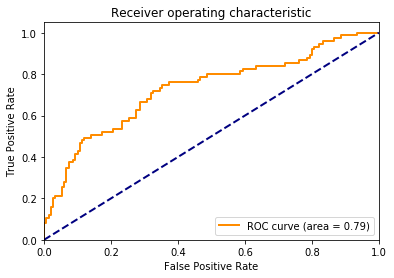

In [13]:
plt.figure()
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()